In [28]:
%matplotlib inline  
import sys, time, os,shutil,datetime, math
import numpy as np
import matplotlib.pylab as plt
from molSimplify.Classes import globalvars
from molSimplify.Classes import mol3D
from molSimplify.Informatics.autocorrelation import*
from molSimplify.Informatics.misc_descriptors import*
from molSimplify.Informatics.RACassemble import*
from molSimplify.Informatics.graph_analyze import*
from molSimplifyAD.ga_tools import* 
import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [21]:
class quickClass:
    def __init__(self,name,descriptor_names,descriptors):
        self.name = name
        self.descriptor_names = descriptor_names
        self.descriptors = descriptors

        
def write_descriptor_csv(list_of_runs,name):
    with open(name +'.csv','w') as f:
        f.write('runs,')
        n_cols = len(list_of_runs[0].descriptor_names)
        for i,names in enumerate(list_of_runs[0].descriptor_names):
            if i<(n_cols-1):
                f.write(names+',')
            else:
                f.write(names+'\n')
        for runs in list_of_runs:
            f.write(runs.name)
            for properties in runs.descriptors:
                    f.write(','+str(properties))
            f.write('\n')
def SMILEs_to_liglist(smilesstr,conatoms):
    this_mol = mol3D()
    this_mol.getOBMol(smilesstr,'smistring')
    this_mol.convert2mol3D()
    this_lig  = ligand(mol3D(), [],len(conatoms))
    this_lig.mol = this_mol
    return(this_lig)

In [22]:
list_of_runs =[]

In [47]:
liglist = list()
with open("../enum/finalSmiMonodentate.txt",'r') as f:
    for line in f:
        liglist.append(line.split()[0].replace('#4','#'))

In [48]:
# homolepMonodentatesProj = pickle.load( open( "../enum/homolepMonodentatesProj.p", "r" ) )

# print(homolepMonodentatesProj[1].indices[0])

SMILEs_strings = liglist
ligs = [SMILEs_to_liglist(s,[0]) for s in SMILEs_strings] 
metal_mol = mol3D()
metal_mol.addAtom(atom3D("Fe")) 

405

In [171]:
start_time = time.time()

for i in range(0,10):

    # name = "_".join([metal, 'eq', str(i),'ax', str(j)])
    eq_ligs = 4*[ligs[i]]
    ax_ligs = 2*[ligs[i]]
    eq_cons = 4*[[0]]
    ax_cons = 2*[[0]]
    custom_ligand_dict = {"eq_ligand_list":eq_ligs,
                          "ax_ligand_list":ax_ligs,
                          "eq_con_int_list":eq_cons,
                          "ax_con_int_list":ax_cons}
#     print(liglist[i])
    this_complex = assemble_connectivity_from_parts(metal_mol,custom_ligand_dict)
    con_mat  = this_complex.graph  
    descriptor_names, descriptors = get_descriptor_vector(this_complex,custom_ligand_dict)
    list_of_runs.append(quickClass(name,descriptor_names,descriptors))
    new_time = (time.time() - start_time)

#     print("--- %s seconds ---" % new_time)
#     print(i)
    
    
    
    plt.subplot(2, 5, i+1)
    
#     plt.spy(con_mat,precision=0.01, markersize=3)
    plt.imshow(con_mat)
    plt.subplots(figsize=(3,5))
    
    
    plt.xticks([])
    plt.yticks([])

    
    
#     plt.title('smiles complex')


plt.show()
        
        

AttributeError: Unknown property figsize

<Figure size 432x288 with 0 Axes>

[<molSimplify.Classes.ligand.ligand instance at 0x7f5509650830>, <molSimplify.Classes.ligand.ligand instance at 0x7f5509650c20>]
--- 0.0963709354401 seconds ---


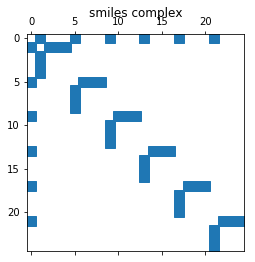

--- 0.220474004745 seconds ---


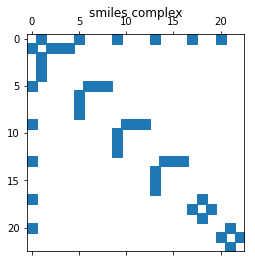

IndexError: list index out of range

In [26]:
SMILEs_strings = ['[NH3]','[N+]=[SH-]']
ligs = [SMILEs_to_liglist(s,[0]) for s in SMILEs_strings] 
metal_mol = mol3D()
metal_mol.addAtom(atom3D("Fe")) 


start_time = time.time()
for i in range(0,6):
    for j in range(0,6):
        ## let's make the eq NH3 ax NSH complex
#         name = "_".join([metal, 'eq', str(i),'ax', str(j)])
        eq_ligs = 4*[ligs[i]]
        ax_ligs = 2*[ligs[j]]
        eq_cons = 4*[[0]]
        ax_cons = 2*[[0]]
        custom_ligand_dict = {"eq_ligand_list":eq_ligs,
                              "ax_ligand_list":ax_ligs,
                              "eq_con_int_list":eq_cons,
                              "ax_con_int_list":ax_cons}
        this_complex = assemble_connectivity_from_parts(metal_mol,custom_ligand_dict)
        con_mat  = this_complex.graph  
        descriptor_names, descriptors = get_descriptor_vector(this_complex,custom_ligand_dict)
        list_of_runs.append(quickClass(name,descriptor_names,descriptors))
        new_time = (time.time() - start_time)

        print("--- %s seconds ---" % new_time)
        plt.spy(con_mat,precision=0.01, markersize=10)
        plt.title('smiles complex')
        plt.show()


In [5]:
write_descriptor_csv(list_of_runs,"filename")